In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from osgeo import gdal

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


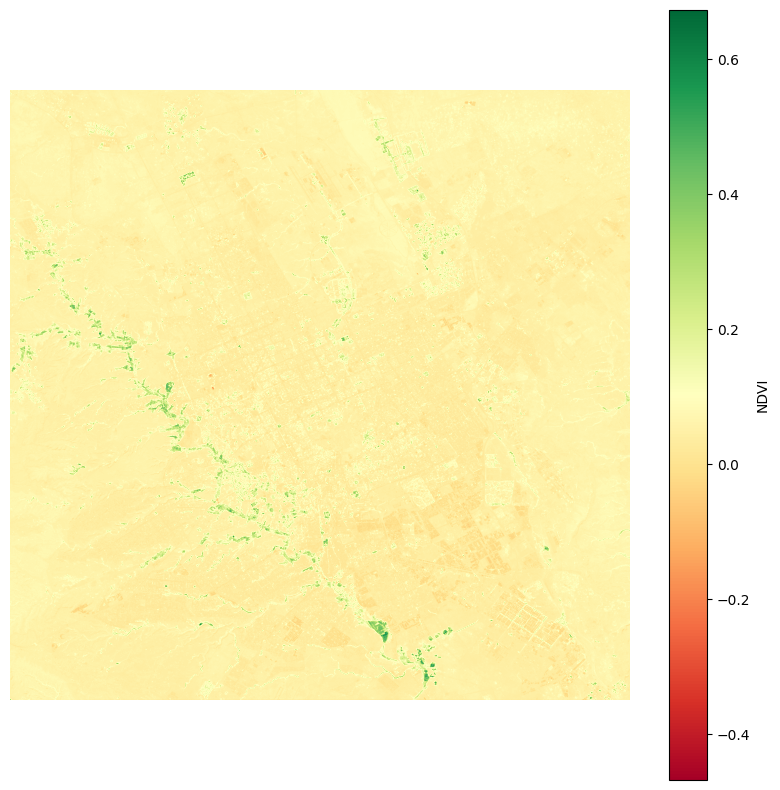

In [4]:
sub_image = gdal.Open('C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Docs\\NDVI-Data\\NDVI_RUH-B4-B8_2023-12-19.tif')

NDVI = sub_image.GetRasterBand(1)
NDVI_array = NDVI.ReadAsArray()
ndvi_processed_all = np.nan_to_num(NDVI_array, nan=0.01)


plt.figure(figsize=(10, 10))
plt.imshow(ndvi_processed_all, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.axis('off')  # Turn off the axis
plt.show()

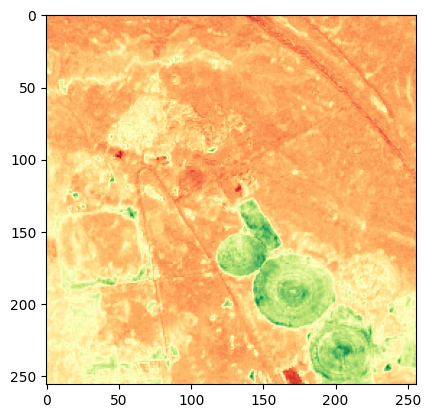

In [7]:
sub_image = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Docs\\sub_images\\RUH_2018-12-15_0_14.npy"
# Load the sub-image as a NumPy array
sub_image = np.load(sub_image)
ndvi_processed_all = np.nan_to_num(sub_image, nan=0.01)
plt.imshow(ndvi_processed_all,cmap='RdYlGn')

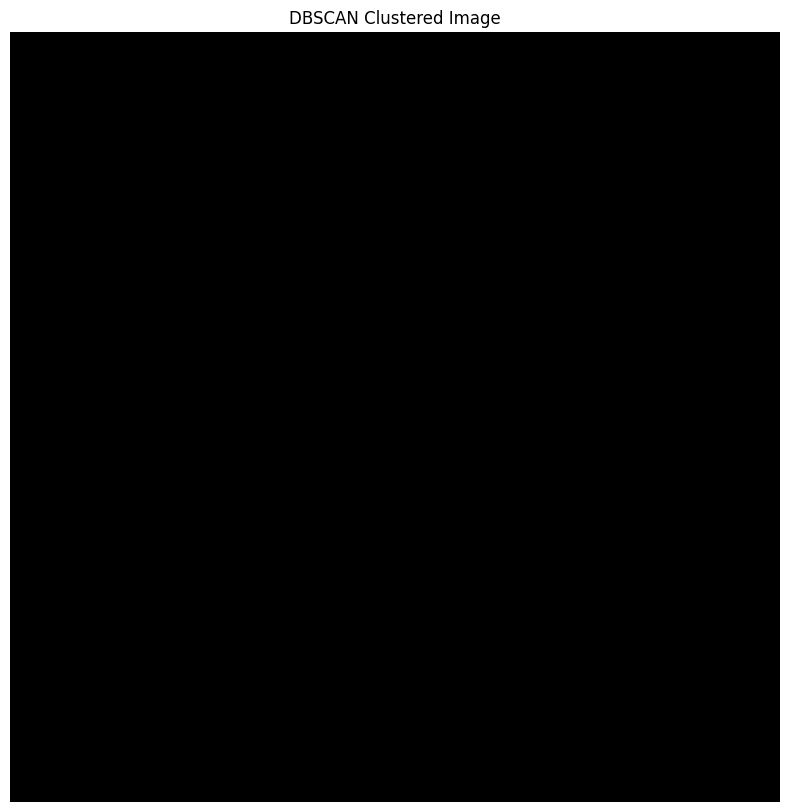

Noise: 100.00%


In [9]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def cluster_image_with_dbscan(ndvi_processed_all, eps, min_samples):
    """
    Clusters the image using DBSCAN and reshapes the labels to the original image shape.
    Handles both 2D and 3D images.
    """
    if ndvi_processed_all.ndim == 3:
        original_shape = ndvi_processed_all.shape[:2]
        pixels = ndvi_processed_all.reshape(-1, ndvi_processed_all.shape[2])
    elif ndvi_processed_all.ndim == 2:
        original_shape = ndvi_processed_all.shape
        pixels = ndvi_processed_all.flatten().reshape(-1, 1)
    else:
        raise ValueError("Unsupported image dimensionality. Image must be 2D or 3D.")

    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(pixels)
    labels = dbscan.labels_

    # Handling noise points (labelled as -1) by setting them to a separate cluster
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    labels[labels == -1] = num_clusters  # Set noise points to an extra cluster

    return dbscan, labels.reshape(original_shape)

def plot_clustered_image(clustered_img, title='DBSCAN Clustered Image'):
    """
    Plots the clustered image.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(clustered_img, cmap='nipy_spectral')
    plt.title(title)
    plt.axis('off')
    plt.show()

def calculate_cluster_percentages(dbscan_labels):
    """
    Calculates and prints the percentage of pixels in each cluster, including noise.
    """
    total_pixels = dbscan_labels.size
    unique, counts = np.unique(dbscan_labels, return_counts=True)
    percentages = {k: count / total_pixels * 100 for k, count in zip(unique, counts)}
    return percentages

# Example usage
eps = 0.5  # Example value, adjust based on your data
min_samples = 10  # Example value, adjust based on your data
dbscan, dbscan_labels = cluster_image_with_dbscan(ndvi_processed_all, eps, min_samples)
plot_clustered_image(dbscan_labels)

percentages = calculate_cluster_percentages(dbscan_labels)
for cluster, percentage in percentages.items():
    cluster_id = "Noise" if cluster == max(percentages.keys()) else f"Cluster {cluster}"
    print(f"{cluster_id}: {percentage:.2f}%")


In [ ]:
import hdbscan

def cluster_image_with_hdbscan(ndvi_processed_all, min_samples, min_cluster_size):
    """
    Clusters the image using HDBSCAN and reshapes the labels to the original image shape.
    Handles both 2D and 3D images.
    """
    if ndvi_processed_all.ndim == 3:
        original_shape = ndvi_processed_all.shape[:2]
        pixels = ndvi_processed_all.reshape(-1, ndvi_processed_all.shape[2])
    elif ndvi_processed_all.ndim == 2:
        original_shape = ndvi_processed_all.shape
        pixels = ndvi_processed_all.flatten().reshape(-1, 1)
    else:
        raise ValueError("Unsupported image dimensionality. Image must be 2D or 3D.")

    clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
    labels = clusterer.fit_predict(pixels)

    # Handling noise points (labelled as -1) by setting them to a separate cluster
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    labels[labels == -1] = num_clusters  # Set noise points to an extra cluster

    return clusterer, labels.reshape(original_shape)

def plot_clustered_image(clustered_img, title='HDBSCAN Clustered Image'):
    """
    Plots the clustered image using HDBSCAN clusters.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(clustered_img, cmap='nipy_spectral')
    plt.title(title)
    plt.axis('off')
    plt.show()

def calculate_cluster_percentages(dbscan_labels):
    """
    Calculates and prints the percentage of pixels in each cluster, including noise.
    """
    total_pixels = dbscan_labels.size
    unique, counts = np.unique(dbscan_labels, return_counts=True)
    percentages = {k: count / total_pixels * 100 for k, count in zip(unique, counts)}
    return percentages

# Example usage
min_samples = 10  # Example value, adjust based on your data
min_cluster_size = 500  # Example value, adjust based on your data
hdbscan_clusterer, hdbscan_labels = cluster_image_with_hdbscan(ndvi_processed_all, min_samples, min_cluster_size)
plot_clustered_image(hdbscan_labels)

percentages = calculate_cluster_percentages(dbscan_labels)
for cluster, percentage in percentages.items():
    cluster_id = "Noise" if cluster == max(percentages.keys()) else f"Cluster {cluster}"
    print(f"{cluster_id}: {percentage:.2f}%")
